In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import plotly.express as px

# mục tiêu
+ tiến hành kiểm định giá trị trung bình của một tổng thể
+ so sánh giá trị trung bình của hai tổng thể

In [2]:
df = pd.read_csv("C:\\Users\\FPTSHOP\\Downloads\\house_price_Dống-Da_Hà-Nội_subdata.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


In [4]:
df.isna().sum()

area                   6
price                 54
postDate               0
land_certificate     302
house_direction      629
balcony_direction    647
toilet               431
bedroom              351
floor                305
lat                    0
long                   0
property_type          0
dtype: int64

In [5]:
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


# Vẽ biểu đồ so sánh phân phối giá (triệu đ/m2) giữa nhà Phố và Nhà ngõ

In [6]:
df.property_type.unique()

array(['trong ngo', 'mat pho'], dtype=object)

In [7]:
df_trongngo = df.loc[df['property_type'] == 'trong ngo', ['area', 'price']]

In [8]:
df_trongngo.isna().sum()

area      3
price    42
dtype: int64

C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

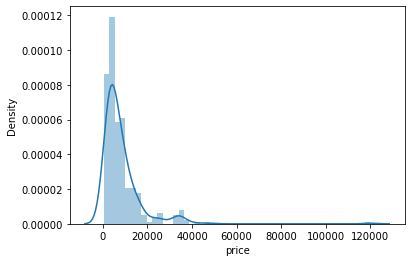

In [9]:
sns.distplot(df_trongngo['price'])

In [10]:
df_matpho = df.loc[df['property_type'] == 'mat pho', ['area', 'price']]

C:\Users\FPTSHOP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

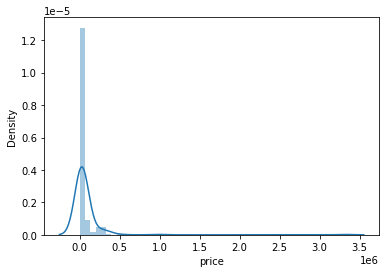

In [11]:
sns.distplot(df_matpho['price'])

# xử lí dữ liệu có giá trị nan hoặc inf trong cột price

+ xử lí nhà trong ngỏ

In [12]:
df_trongngo['price'].mode()

0    4500.0
1    9300.0
dtype: float64

In [13]:
df_trongngo['price'] = df_trongngo['price'].fillna(df_trongngo['price'].mode()[1] )

In [14]:
df_trongngo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 448
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    446 non-null    float64
 1   price   449 non-null    float64
dtypes: float64(2)
memory usage: 10.5 KB


In [15]:
df_trongngo['price'].unique()

array([ 14700. ,   4200. ,  11000. ,   2900. ,   3950. ,   8900. ,
         5280. ,   5376.6,   1800. ,   2400. ,   2000. ,   2600. ,
         1180. ,   1350. ,   3800. ,   3450. ,   1750. ,   2200. ,
         1290. ,   1600. ,   1700. ,   6500. ,   2450. ,   1300. ,
         1850. ,    850. ,   1170. ,   1250. ,   1200. ,   1630. ,
         3500. ,   8200. ,    900. ,   3200. ,   2050. ,    890. ,
         1550. ,   1950. ,   2950. ,   3900. ,    550. ,   1780. ,
         2100. ,    450. ,   1900. ,   1730. ,   2080. ,   1450. ,
         4000. ,   2300. ,   1490. ,   1500. ,   1330. ,   3100. ,
         6100. ,   9300. ,   6000. ,   7250. ,  15500. ,   5000. ,
         3600. ,   3150. ,   7400. ,  10000. ,   2650. ,  23000. ,
         4500. ,   2350. ,   8400. ,   2750. ,   4800. ,  14500. ,
         4350. ,   3750. ,  10500. ,   7700. ,   4300. ,   1100. ,
         3850. ,   3300. ,   6700. ,   3400. ,   2250. ,   7000. ,
         5300. ,   9400. ,   6300. ,   4700. ,   1990. ,   148

In [16]:
df_trongngo[df_trongngo['price'] == np.inf]

,area,price


+ xử lí nhà mặt phố

In [17]:
df_matpho.isna().sum()

area      3
price    12
dtype: int64

In [18]:
df_matpho['price'].mode()

0    330000.0
dtype: float64

In [19]:
df_matpho['price'] = df_matpho['price'].fillna(df_matpho['price'].mode()[0] )

In [20]:
df_matpho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 449 to 670
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    219 non-null    float64
 1   price   222 non-null    float64
dtypes: float64(2)
memory usage: 5.2 KB


# xử lí dữ liệu ngoại lai

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df_trongngo)
# lấy danh sáchc cột
col_names = list(df_trongngo.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

<AxesSubplot:xlabel='price', ylabel='Density'>

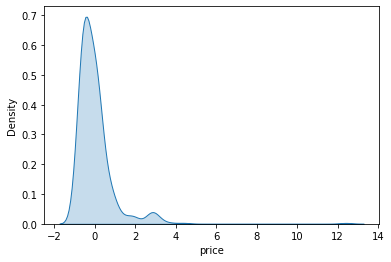

In [23]:

sns.kdeplot(df_s['price'], shade = True)

In [24]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s1= s_scaler.fit_transform(df_matpho)
# lấy danh sáchc cột
col_names = list(df_matpho.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s1 = pd.DataFrame(df_s1, columns=col_names)

<AxesSubplot:xlabel='price', ylabel='Density'>

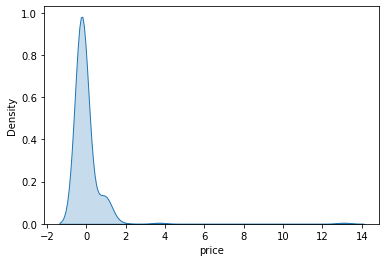

In [25]:
sns.kdeplot(df_s1['price'], shade = True)

In [26]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    446 non-null    float64
 1   price   449 non-null    float64
dtypes: float64(2)
memory usage: 7.1 KB


In [27]:
df_trongngo

,area,price
0,50.0,14700.0
1,57.0,4200.0
2,62.0,11000.0
3,26.0,2900.0
4,40.0,3950.0
...,...,...
444,90.0,32000.0
445,58.0,15800.0
446,96.0,10200.0
447,38.0,3900.0


# Kiểm định giả thuyết giá (triệu đ/m2) nhà mặt phố cao hơn giá nhà trong ngõ với mức ý nghĩa 5%

# tiến hành kiểm định
+ apla = 0.05
+ gọi A là nhà mặt phố, B là nhà trong ngỏ ( kiểm định phía phải)
+ H0 = B - A <= 0
+ H1 = B - A > 0

In [28]:
stats.ttest_ind(df_s.price, df_s1.price,equal_var=False)

Ttest_indResult(statistic=-1.1637655289548887e-15, pvalue=0.9999999999999991)

# kết luận:
+ 𝑃𝑣𝑎𝑙𝑢𝑒<2𝛼,  statistic >0
+ với pvalue lớn hơn rất nhiều và statistic = 0  nên ta bác bỏ H0 và chấp nhận H1 => giá nhà mặt phố có thể thấp hơn so trong ngõ

# Giá của những căn nhà không có thông tin về giấy tờ pháp lý thấp hơn giá nhà những căn có thông tin về giấy tờ pháp lý với mức ý nghĩa 5%

In [29]:
df.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [30]:
df[df['land_certificate'].isna() == True]['land_certificate']

5      NaN
72     NaN
73     NaN
74     NaN
75     NaN
      ... 
664    NaN
665    NaN
666    NaN
668    NaN
669    NaN
Name: land_certificate, Length: 302, dtype: object

In [31]:
df[df['land_certificate'].isna() == True]['land_certificate']

5      NaN
72     NaN
73     NaN
74     NaN
75     NaN
      ... 
664    NaN
665    NaN
666    NaN
668    NaN
669    NaN
Name: land_certificate, Length: 302, dtype: object

In [32]:
df.land_certificate.unique()

array(['So do', nan], dtype=object)

In [33]:
stats.ttest_ind(df[df['land_certificate'].isna() == True]['price'], df[df['land_certificate'] == 'so do']['price'], equal_var=False)

Ttest_indResult(statistic=nan, pvalue=nan)